In [1]:
import numpy as np
from __future__ import division
import random

from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10

# Plot Surface

In [2]:
def plot_surface(x, y, z,  rstride=1, cstride=1, color='g', linewidth = 1, cmap='viridis', edgecolor='none', colorbar=True): # cmap=cm.jet
    fig = plt.figure(figsize = (16,12))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(x, y, z, rstride=rstride, cstride=cstride, color=color, cmap=cmap, edgecolor=edgecolor);

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)
    
    ax.view_init(50, 10)

    if colorbar: fig.colorbar(surf, shrink=0.5, aspect=8)

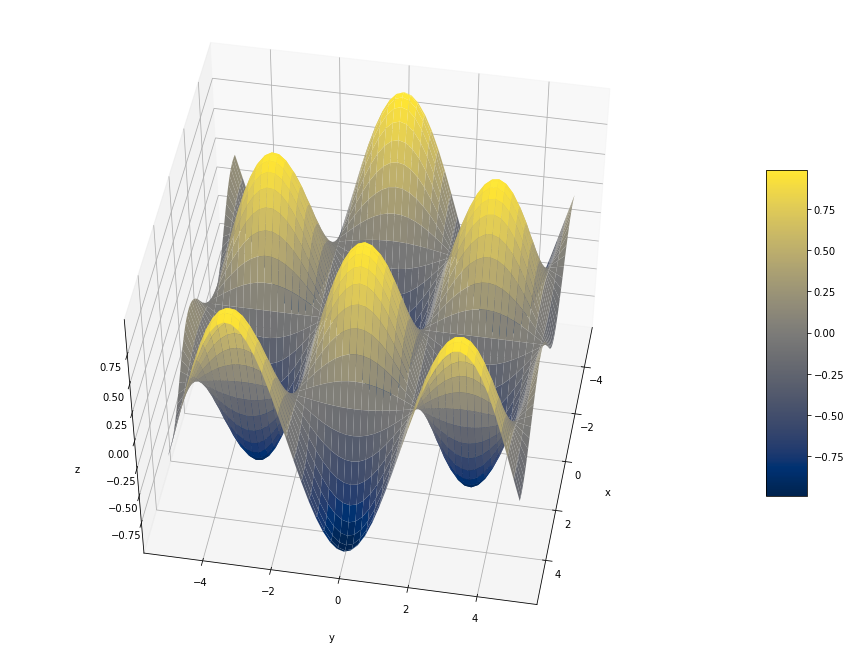

In [3]:
x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

plot_surface(X, Y, Z, cmap = plt.cm.cividis)

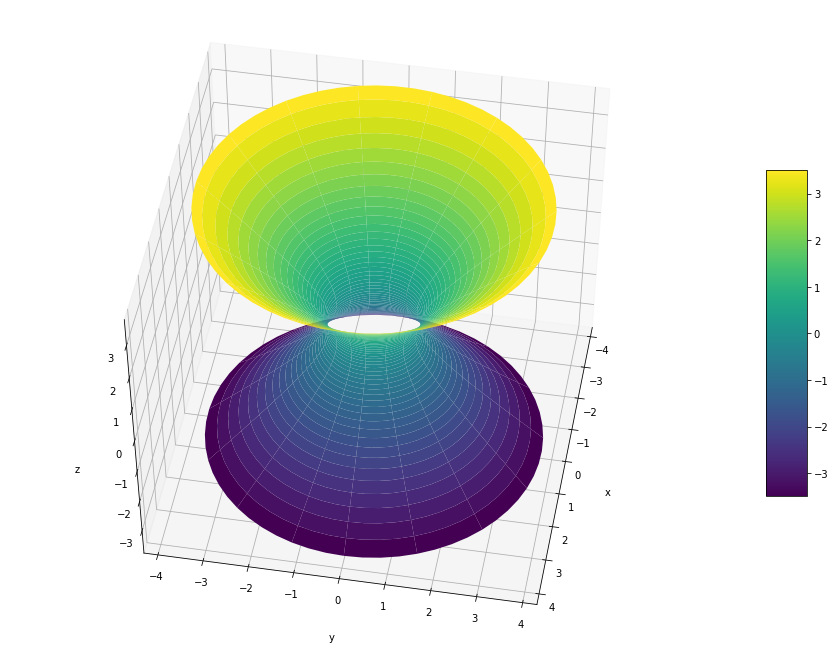

In [4]:
r = 1; 
u = np.linspace(-2, 2, 200);
v = np.linspace(0, 2*np.pi, 60);
[u, v] = np.meshgrid(u, v);

a, b, c = 1, 1, 1

x = a * np.cosh(u) * np.cos(v)
y = b * np.cosh(u) * np.sin(v)
z = c * np.sinh(u)

plot_surface(x, y, z,  rstride=4, cstride=4, color='g');#, cmap=cm.jet);

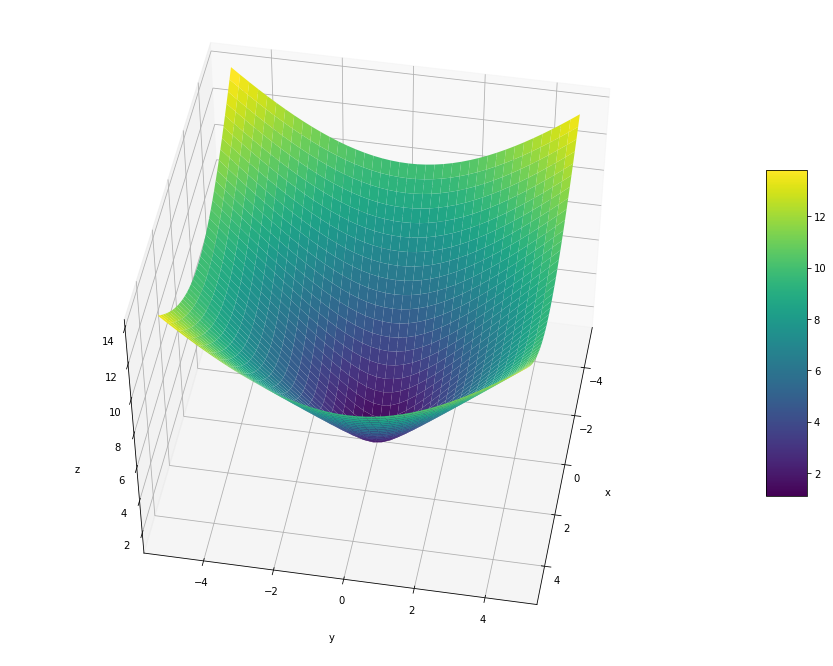

In [5]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)
Z = np.sqrt( 4. * ( X**2 + Y**2 ) / 1. +  1 )

plot_surface( X, Y, Z )

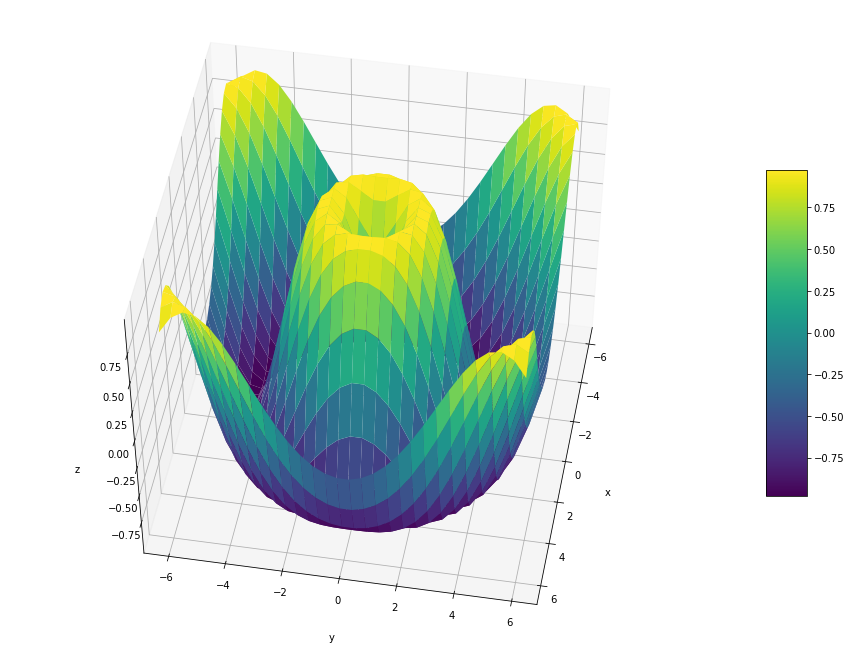

In [6]:
def f(x, y): return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plot_surface(
    X, Y, Z, 
    rstride = 1, 
    cstride = 1,
    cmap = 'viridis', #plt.cm.YlGnBu_r
    edgecolor = 'none'
)

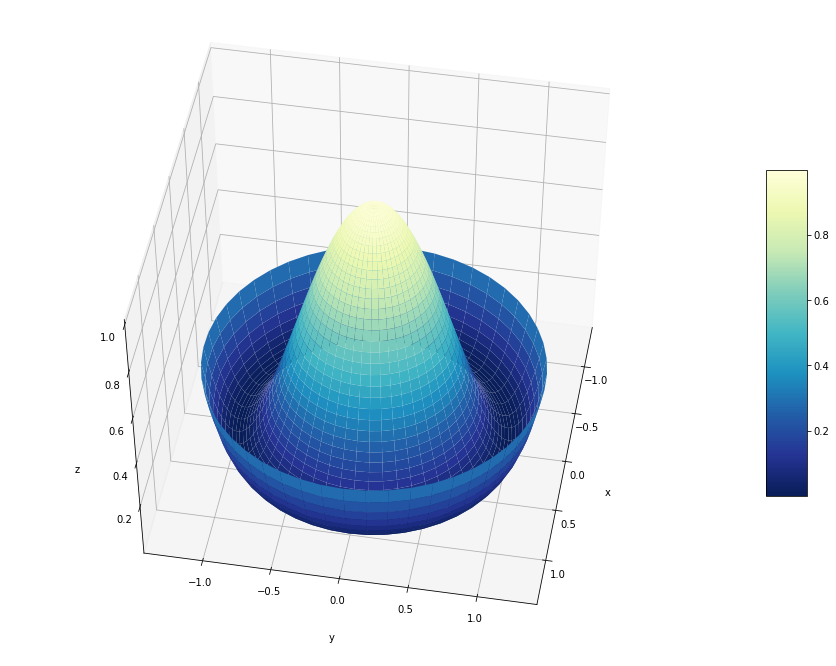

In [7]:
# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

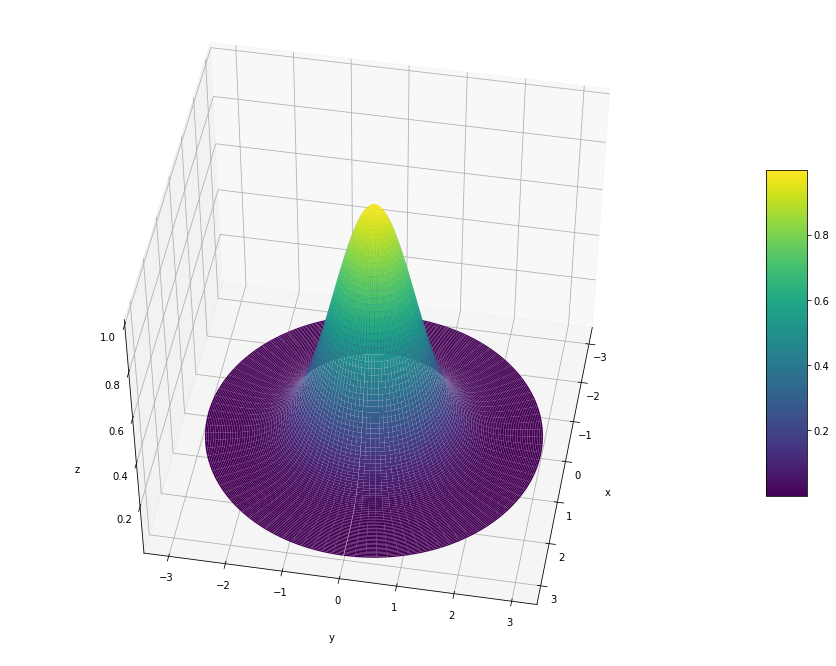

In [8]:
def surface_of_rev(u,v):
    f = v
    x = f*np.cos(u)
    y = f*np.sin(u)
    z = np.exp(-v**2) 
    return x,y,z

pi = 3.14
n = 100 #######
a, b = 3, 1

U = np.linspace(0, 2*pi, n)
V = np.linspace(0., 3, n)
U, V = np.meshgrid(U, V)
x, y, z = surface_of_rev(U, V)

# curve
T = np.linspace(0, 3, 100)
xx,yy,zz = surface_of_rev(a*T+b, 2*T)

plot_surface(x, y, z)

# Plot Trisurf

In [9]:
mpl.rcParams['font.size'] = 10

def plot_trisurf(x, y, z, color='g', linewidth = 1, cmap='viridis', edgecolor='none', colorbar=False): # cmap=cm.jet
    fig = plt.figure(figsize = (16,12))
    ax = plt.axes(projection='3d')
    surf = ax.plot_trisurf(x, y, z, color=color, cmap=cmap, edgecolor=edgecolor);

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)
    
    ax.view_init(50, 10)

    if colorbar: fig.colorbar(surf, shrink=0.5, aspect=8)

### Hyperbolic paraboloid

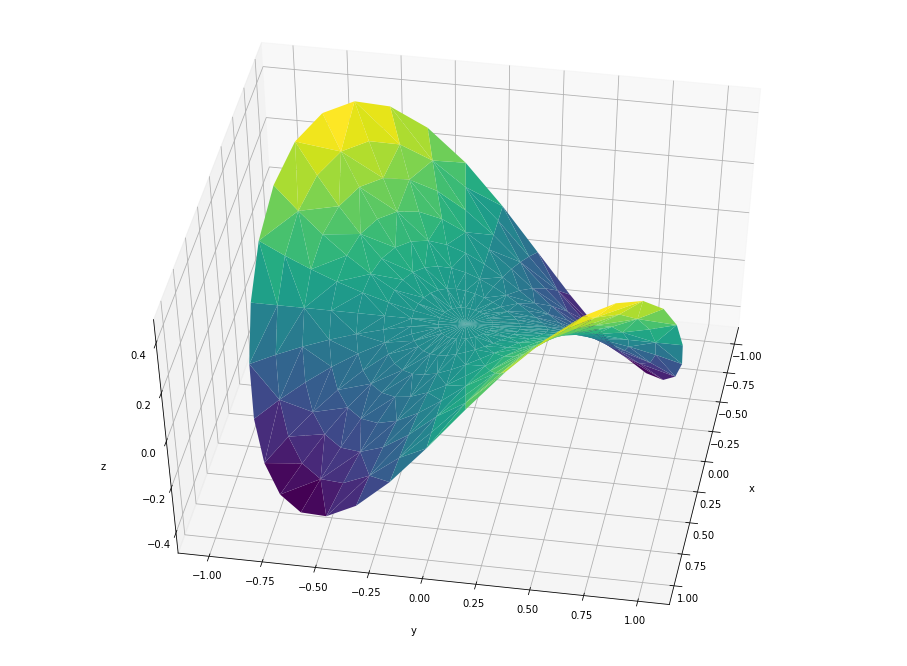

In [10]:
n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append( 0, (radii * np.cos(angles) ).flatten() )
y = np.append( 0, (radii * np.sin(angles) ).flatten() )

# Pringle surface
z = np.sin(x * y)
#z = np.sin(-x * y)

plot_trisurf(x, y, z, linewidth=0.2); #  cmap=cm.jet

# Plot Wireframe

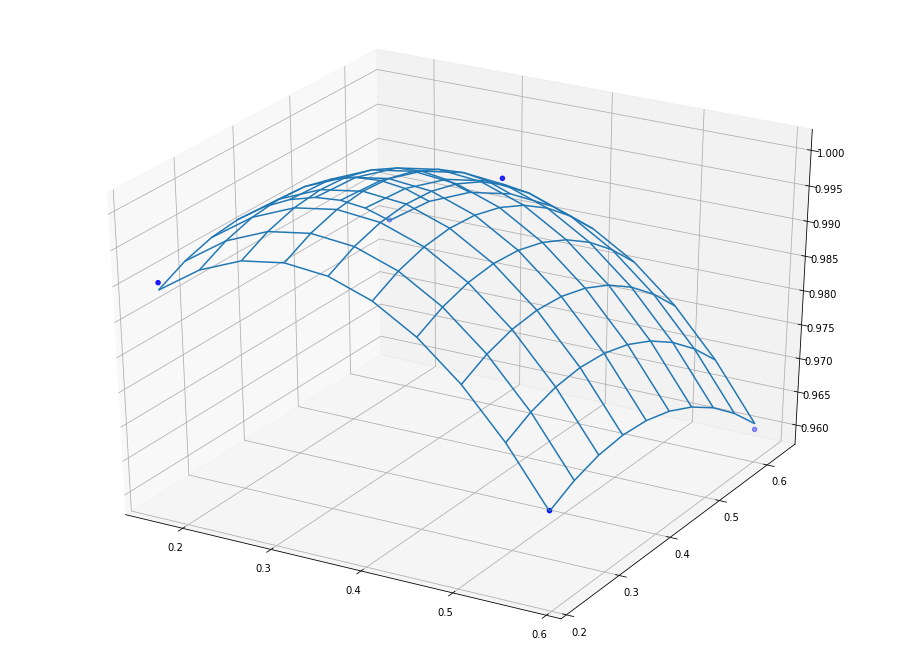

In [11]:
 import scipy.optimize as opt


def paraBolEqn(data, a, b, c, d):
    x, y = data
    return -(( ( x - b ) / a )**2  +  ( ( y - d ) / c )**2) + 1.0

doex = [0.4,0.165,0.165,0.585,0.585]
doey = [.45, .22, .63, .22, .63]
doez = np.array([1, .99, .98,.97,.96])

popt, pcov = opt.curve_fit(
    paraBolEqn,
    np.vstack( ( doex, doey ) ), 
    doez,
    p0 = [ 1.5, 0.4, 1.5, 0.4 ]
)

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111, projection='3d')

x_ = np.linspace(np.min(doex), np.max(doex),10)
y_ = np.linspace(np.min(doey), np.max(doey), 10)

x, y = np.meshgrid( x_, y_)
f = paraBolEqn((x,y), *popt)

ax.plot_wireframe( x,  y,  f )
ax.scatter(doex, doey, doez, color='b');

In [12]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

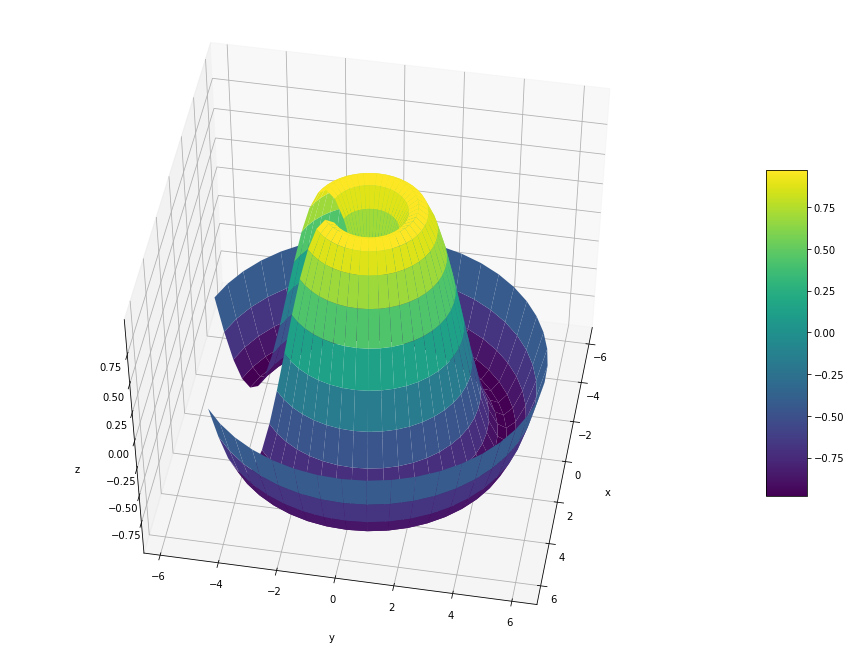

In [13]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

plot_surface(
    X, Y, Z, 
    rstride=1, 
    cstride=1,
    cmap='viridis', 
    edgecolor='none'
);

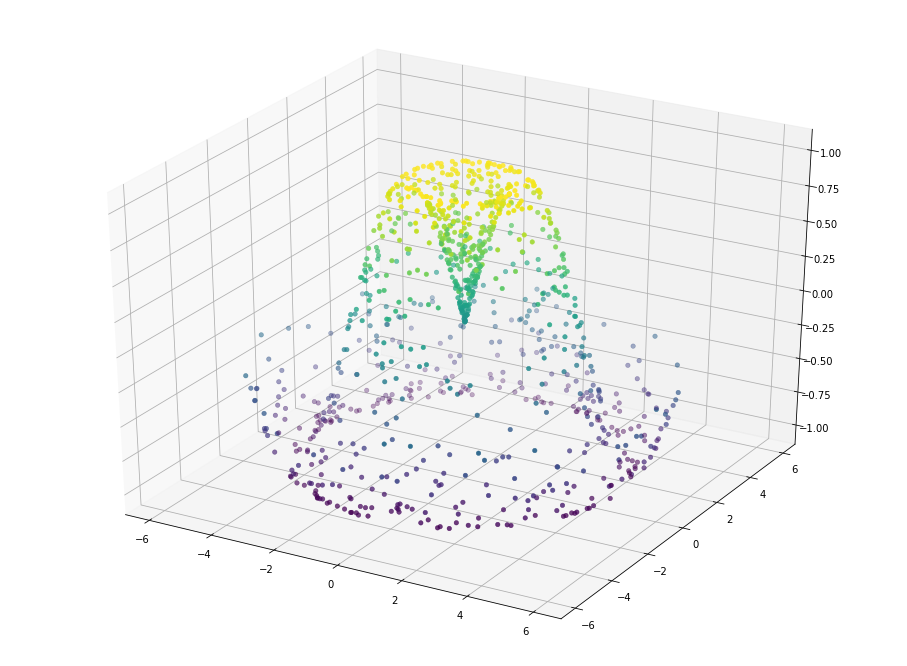

In [14]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

fig = plt.figure(figsize = (16,12))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

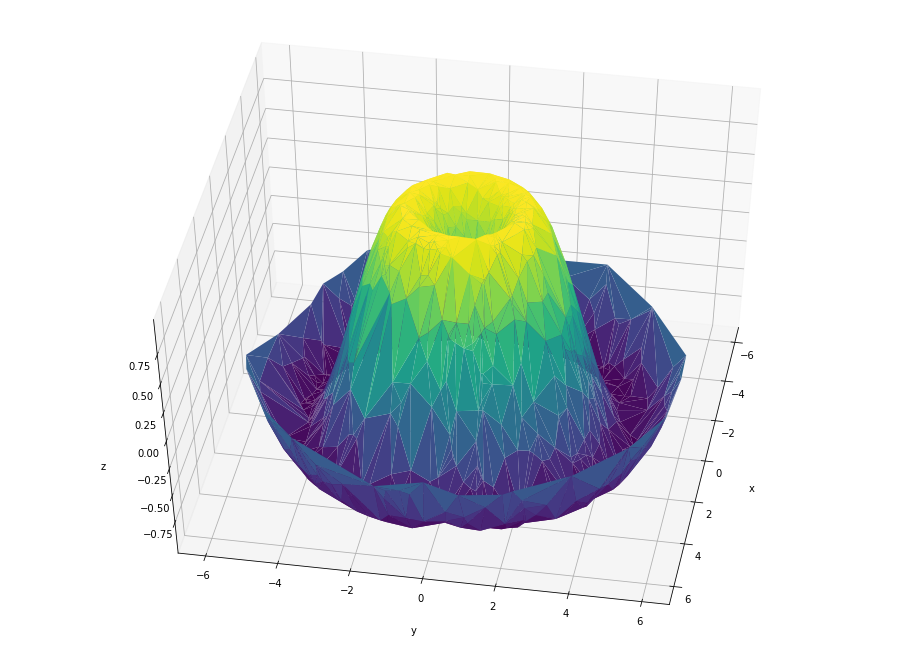

In [15]:
plot_trisurf(
    x, y, z,
    cmap='viridis', 
    edgecolor='none'
);